In [1]:
'''
Population data from FRED API

'''

import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
import numpy as np
import os
from dateutil import parser
from collections import defaultdict

In [2]:

def do_series_search(search_data):
    '''
    Does a search of FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_search_url = 'https://api.stlouisfed.org/fred/series/search?api_key=4a35874b8a4526dd50b390e46f396651&search_text={0}&file_type=json'  
    if type(search_data) != type(list):
        search_data = [search_data]
    search_string = '+'.join([x.lower() for x in search_data])
    print(search_string)
    fred_response = requests.get(fred_search_url.format(search_string))
    result = fred_response.json()
    return result
    
def get_series(series_id):
    '''
    Fetches FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_series_fetch_url = 'https://api.stlouisfed.org/fred/series/observations?series_id={0}' + \
'&api_key=4a35874b8a4526dd50b390e46f396651&file_type=json'
    fred_response = requests.get(fred_series_fetch_url.format(series_id))
    result = fred_response.json()
    #print(result)
    return result 


def get_population_data(country):
    '''
    Get Poplatation data from FRED
    INPUT: Country (String)
    OUTPUT: dictionary of data 
    '''
    population_titles_of_interest = [
    'Employment to Population Ratio for',
    'Age Dependency Ratio: Older Dependents to Working-Age Population for',
    'Population Ages 15 to 64 for',
    'Population, Total for',
    'Population'
    ]

    search_string = country.lower()
    
    country_series  = do_series_search(search_string)
    series_ids = {}
    series_notes = {}
    #print(country_series)

    for elem in country_series['seriess']:
        #print(elem)
        for title in population_titles_of_interest:
            #if elem['title'].startswith(title):
            if 'population' in elem['title'].lower():
                series_ids[elem['title']] = elem['id']
                series_notes[elem['title']] = elem['notes']
    print(series_ids)
    ans = {}
    for title, series_id in series_ids.items():
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[title] = series
    
    return ans


def get_series_info_by_title(title, country):
    '''
    Get series data by specific title
    INPUT: title (str) 
            country (str)
    OUTPUT: series info
    
    '''
    print(title)
    print(country)
    save_country = country
    if country.lower() == 'south korea':
        country = 'republic of korea'
    country_series  = do_series_search(country.lower())
    series_ids = {}
    series_notes = {}
    for elem in country_series['seriess']:
        print(elem['title'] ,elem['frequency'], elem['id'])
        #print(elem)
        if title.lower() == elem['title'].lower():
            if 'frequency' in elem:
                if elem['frequency'].lower() == 'annual':
                    print('found one {0}'.format(title))
                    print(elem)
                    series_ids[elem['title']] = elem['id']
                    series_notes[elem['title']] = elem['notes']
    print('series ids', series_ids)
    ans = {}
    # For some reason cannot generically find us data
    # series_id['population, total for united states'] = 'POPTOTUSA647NWDB'
    # series_notes = {'title':'population, total for united states'}
    for title, series_id in series_ids.items():
        print('search1', title, series_id)
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[save_country] = series
    return ans
    

        
                
    
    
    

In [3]:
'''
These do not work as the titles vary by country

'''

def get_total_population_data_for_counry_set(country_set):
    '''
    Get total population
    
    '''
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population for {0}'.format(country)
        if country.lower() in {'usa', 'united states'}:
            title_string = 'population' 
        print(title_string)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data


'''


'''
def get_working_age_percent_for_country_set(country_set):
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population ages 15 to 64 for {0}'.format(country)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data
    
    
    

In [4]:
this_set = get_total_population_data_for_counry_set(['United States'])





population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesd

All Employees: Mining and Logging: Coal Mining Monthly CES1021210001
Residual (Assets Less Liabilities), All Commercial Banks Monthly RALACBM027SBOG
ICE BofAML Emerging Markets Corporate Plus Index Option-Adjusted Spread Daily BAMLEMCBPIOAS
Federal Funds Target Rate (DISCONTINUED) Daily, 7-Day DFEDTAR
Bank Prime Loan Rate Changes: Historical Dates of Changes and Rates Not Applicable PRIME
Unemployment Rate: Aged 15-64: All Persons for the United States Monthly LRUN64TTUSM156S
Delinquency Rate on Commercial and Industrial Loans, All Commercial Banks Quarterly, End of Period DRBLACBN
Crude Birth Rate for the United States Annual SPDYNCBRTINUSA
Commercial Real Estate Prices for United States Quarterly COMREPUSQ159N
Personal Consumption Expenditures: Durable Goods Quarterly PCDG
Unemployment Rate: Aged 15-64: All Persons for the United States Quarterly LRUN64TTUSQ156N
Balance of Payments for United States Annual USABCAGDPBP6
Median Sales Price for New Houses Sold in the United States Annua

In [5]:
this_set

{'United States': {'United States': {'title': 'Population',
   'units': 'lin',
   'notes': 'Population includes resident population plus armed forces overseas. The annual estimate is constructed as an average of monthly series https://fred.stlouisfed.org/series/POPTHM. \nBEA Account Code: B230RC',
   'dates': ['1929-01-01',
    '1930-01-01',
    '1931-01-01',
    '1932-01-01',
    '1933-01-01',
    '1934-01-01',
    '1935-01-01',
    '1936-01-01',
    '1937-01-01',
    '1938-01-01',
    '1939-01-01',
    '1940-01-01',
    '1941-01-01',
    '1942-01-01',
    '1943-01-01',
    '1944-01-01',
    '1945-01-01',
    '1946-01-01',
    '1947-01-01',
    '1948-01-01',
    '1949-01-01',
    '1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '196

In [6]:
country_set = ['China', 'Japan', 'Republic of Korea', 'Germany', 'United States']

In [7]:
total_population_set = get_total_population_data_for_counry_set(country_set)

population for china
population for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M2 for China Monthly MYAGM2CNM189N
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
Exports: Value Goods for China Annual XTEXVA01CNA667S
Exports: Value Goods for China Monthly XTEXVA01CNM659S
M1 for China Monthly M

Loans from Non-Resident Banks, Net, to GDP for China Annual DDOI08CNA156NWDB
Use of Financial Services: Key Indicators, Household Loan Accounts with Commercial Banks Per 1,000 Adults for China, P.R.: Mainland Annual CHNFCNODCHANUM
Business Tendency Surveys for Retail Trade: Employment: Future Tendency: European Commission and National Indicators for China (DISCONTINUED) Quarterly BREMFT02CNQ460N
Amount Outstanding Due within One Year of International Debt Securities for Non-financial Corporations Sector, Residence of Issuer in China Quarterly IDS1YMAORINCCN
Financial Account: Portfolio Investment Liabilities for China (DISCONTINUED) Quarterly BPFAPI03CNQ637N
Financial Account: Portfolio Investment Liabilities for China (DISCONTINUED) Annual BPFAPI03CNA637N
Use of Financial Services: Key Indicators, Outstanding Small and Medium Enterprises Loans from Commercial Banks for China, P.R.: Macao Annual MACFCSODCSGGDPPT
Value of Exports to Province of China Taiwan from Missouri Annual MOTWNA05

population for japan
population for japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Quarterly JPNCP

Working Age Population: Aged 15-24: All Persons for Japan Monthly LFWA24TTJPM647S
Working Age Population: Aged 15-24: All Persons for Japan Monthly LFWA24TTJPM647N
Working Age Population: Aged 15-24: All Persons for Japan Quarterly LFWA24TTJPQ647N
Working Age Population: Aged 15-24: All Persons for Japan Annual LFWA24TTJPA647S
Balance of payments BPM6: Capital account: Capital account Balance: Capital account Balance for Japan Quarterly JPNB6CATT00NCCUQ
Employment Rate: Aged 15-74: All Persons for Japan Monthly LREM74TTJPM156N
Employment Rate: Aged 15-74: All Persons for Japan Quarterly LREM74TTJPQ156S
Employment Rate: Aged 15-74: All Persons for Japan Annual LREM74TTJPA156S
Employment Rate: Aged 15-74: All Persons for Japan Quarterly LREM74TTJPQ156N
Employment Rate: Aged 15-74: All Persons for Japan Annual LREM74TTJPA156N
Total Harmonized Unemployment: All Persons for Japan Annual LFHUTTTTJPA647N
Total Harmonized Unemployment: All Persons for Japan Quarterly LFHUTTTTJPQ647S
Total Harm

population for republic of korea
population for republic of korea
Republic of Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Consumer Price Index: All Items for Korea Quarterly KORCPIALLQINMEI
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Kor

Early Estimate of Quarterly ULC Indicators: Total Labor Compensation per Unit of Labor Input for the Republic of Korea Quarterly ULQECU01KRQ657S
Early Estimate of Quarterly ULC Indicators: Total Labor Compensation per Unit of Labor Input for the Republic of Korea Quarterly ULQECU01KRQ661N
Share Prices: All shares/broad: Total: Total for the Republic of Korea Quarterly KORSPASTT01GYQ
Share Prices: All shares/broad: Total: Total for the Republic of Korea Monthly KORSPASTT01GYM
Consumer Price Index: Furnishings, household equip. and routine household maintenance (COICOP 05): Total: Total for the Republic of Korea Monthly KORCP050000IXNBM
Consumer Price Index: Furnishings, household equip. and routine household maintenance (COICOP 05): Total: Total for the Republic of Korea Quarterly KORCP050000IXNBQ
Consumer Price Index: Furnishings, household equip. and routine household maintenance (COICOP 05): Total: Total for the Republic of Korea Quarterly KORCP050000GPQ
Short term statistics: Stocks

population for germany
population for germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for Ger

Goods, Value of Exports for Germany Monthly VALEXPDEM052N
Leading Indicators OECD: Component series: Interest rate spread: Normalised for Germany Monthly DEULOCOSINOSTSAM
Employment Rate: Aged 25-54: Females for Germany Annual LREM25FEDEA156N
Investment Share of Purchasing Power Parity Converted GDP Per Capita at constant prices for Germany Annual KIPPPGDEA156NUPN
Activity Rate: Aged 25-54: Females for Germany Quarterly LRAC25FEDEQ156S
Employment by Economic Activity: Services: All Persons for Germany Quarterly LFEASETTDEQ647S
Exchange Rate (market+estimated) for Germany Annual XRNCUSDEA618NRUG
Consumption Share of Purchasing Power Parity Converted GDP Per Capita at current prices for Germany Annual CSPPPGDEA156NUPN
Inactivity Rate: Aged 15-74: All Persons for Germany Quarterly LRIN74TTDEQ156N
International Trade: Exports: Value (goods): Total for Germany Quarterly DEUXTEXVA01CXMLQ
Total Credit to Non-Financial Corporations, Unadjusted for Breaks, for Germany Quarterly, End of Quarter 

population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesd

Federal Funds Target Range - Lower Limit Daily, 7-Day DFEDTARL
ICE BofAML US Corporate AA Effective Yield Daily, Close BAMLC0A2CAAEY
Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average Monthly CUSR0000SEHA
Private Nonresidential Fixed Investment Annual PNFIA
Cass Freight Index: Shipments Monthly FRGSHPUSM649NCIS
Velocity of MZM Money Stock Quarterly MZMV
Disposable Personal Income Monthly DSPI
Unemployment Rate: Aged 15-64: All Persons for the United States Annual LRUN64TTUSA156N
Real Exports of Goods and Services Quarterly A020RO1Q156NBEA
Total Savings Deposits at all Depository Institutions Weekly, Ending Monday SAVINGS
Households and nonprofit organizations; net worth, Level Annual HNONWRA027N
Real Exports of Goods and Services Quarterly A020RL1Q158SBEA
Government total expenditures Annual W068RC1A027NBEA
Private Final Consumption Expenditure in United States Quarterly USAPFCEQDSNAQ
Advance Retail Sales: Retail and Food Services, Total Monthl

In [8]:

total_population_set

{'China': {'China': {'title': 'Population for China',
   'units': 'lin',
   'notes': 'Source ID: pop\n\nWhen using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt\n\nFor more information, see http://www.rug.nl/research/ggdc/data/pwt/.',
   'dates': ['1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-0

In [9]:
working_population_set = get_working_age_percent_for_country_set(country_set)

population ages 15 to 64 for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M2 for China Monthly MYAGM2CNM189N
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
Exports: Value Goods for China Annual XTEXVA01CNA667S
Exports: Value Goods for China Monthly XTEXVA01CNM659S
M1 for China Monthly MYAGM1CN

Producer Price Index by Commodity for Metals and Metal Products: Vitreous China Plumbing Fixtures and China and Earthenware Bathroom Accessories Monthly WPU1052
Producer Price Index by Commodity for Metals and Metal Products: Vitreous China Plumbing Fixtures and China and Earthenware Bathroom Accessories Monthly WPU105201
Producer Price Index by Commodity for Metals and Metal Products: Vitreous China Plumbing Fixtures and China and Earthenware Bathroom Accessories Monthly WPU10520114
Import Price Index: Nonmetallic mineral product manufacturing for China Monthly COCHNZ327
Refugee Population by Country or Territory of Asylum for China Annual SMPOPREFGCHN
Net Issues of International Debt Securities for All Issuers, All Maturities, Nationality of Issuer in China Quarterly IDSGAMNINICN
Geographical Outreach: Key Indicators Commercial Bank Branches Per 100,000 Adults for China, P.R.: Hong Kong Annual HKGFCBODCANUM
Use of Financial Services, Assets: Outstanding Loans to Small and Medium Ente

population ages 15 to 64 for japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQIN

Employment by Economic Activity: Agriculture: All Persons for Japan Quarterly LFEAAGTTJPQ647S
Balance of payments BPM6: Financial account: Financial account Net: Total for Japan Quarterly JPNB6FATT01NCCUQ
Adjusted Unemployment Rate in Japan (DISCONTINUED) Monthly JPNURAMS
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Annual NAEXKP06JPA652S
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Quarterly NAEXKP06JPQ661S
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Quarterly NAEXKP06JPQ659S
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Annual NAEXKP06JPA659S
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Annual NAEXKP06JPA657S
Gross Domestic Product by Expenditure in Constant Prices: Exports of Goods and Services for Japan Annual NAEXKP06JPA

population ages 15 to 64 for republic of korea
Republic of Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Consumer Price Index: All Items for Korea Quarterly KORCPIALLQINMEI
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01K

Broad Money, Index for the Republic of Korea (DISCONTINUED) Annual MABMBM01KRA657S
Broad Money, Index for the Republic of Korea (DISCONTINUED) Annual MABMBM01KRA661S
Producer Prices Index: Economic Activities: Domestic Industrial Activities for the Republic of Korea Monthly PIEATI02KRM661N
Producer Prices Index: Economic Activities: Domestic Industrial Activities for the Republic of Korea Annual PIEATI02KRA661N
Producer Prices Index: Economic Activities: Domestic Industrial Activities for the Republic of Korea Quarterly PIEATI02KRQ661N
Employment by Economic Activity: Industry Including Construction: All Persons for the Republic of Korea Quarterly LFEAICTTKRQ647S
Employment by Economic Activity: Industry Including Construction: All Persons for the Republic of Korea Annual LFEAICTTKRA647S
Employment by Economic Activity: Industry Including Construction: All Persons for the Republic of Korea Monthly LFEAICTTKRM647S
Employment by Economic Activity: Industry Including Construction: All Per

Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Registered Unemployment Rate for G

Real Effective Exchange Rates Based on Manufacturing Consumer Price Index for Germany Annual CCRETT01DEA661N
Producer Prices Index: Total Consumer Goods for Germany Monthly PITGCG01DEM661N
Producer Prices Index: Total Consumer Goods for Germany Quarterly PITGCG01DEQ661N
Harmonized Unemployment: Total: Females for Germany Annual LRHUTTFEDEA156S
Unemployed Population: Aged 15 and Over: All Persons for Germany Annual LFUNTTTTDEA647S
Unemployment Rate: Aged 15 and Over: Females for Germany Annual LRUNTTFEDEA156S
Employed Population: Aged 15-74: All Persons for Germany Annual LFEM74TTDEA647S
Employed Population: Aged 15-74: All Persons for Germany Annual LFEM74TTDEA657S
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ657N
Consumer Price Index: OECD Groups: Housing: Total for Germany Monthly DEUCPGRHO01GYM
Consumer Price Index: OECD Groups: Housing: Total for Germany Quarterly DEUCPGRHO01GYQ
Average Annual Hours Worked per Employed Person in Germany (DISCONTINUE

Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
10-Year Treasury Constant Maturity Minus

S&P/Case-Shiller NY-New York Home Price Index Monthly NYXRNSA
Real imports of goods and services Quarterly IMPGSC1
Private Final Consumption Expenditure in United States Quarterly USAPFCEQDSMEI
Unemployment Rate: Aged 15-64: All Persons for the United States Quarterly LRUN64TTUSQ156S
Civilian Labor Force Participation Rate: Women Monthly LNU01300002
Norway / U.S. Foreign Exchange Rate Annual AEXNOUS
Sweden / U.S. Foreign Exchange Rate Annual AEXSDUS
S&P/Case-Shiller WA-Seattle Home Price Index Monthly SEXRSA
Real Imports of Goods and Services Annual IMPGSCA
Personal income Annual A065RC1A027NBEA
Commercial Banks in the U.S. Quarterly, End of Period USNUM
Median Sales Price for New Houses Sold in the United States Monthly MSPNHSUS
Civilian Labor Force Participation Rate: Men Monthly LNS11300001
Delinquency Rate on Consumer Loans, All Commercial Banks Quarterly, End of Period DRCLACBN
Rental Vacancy Rate for the United States Quarterly RRVRUSQ156N
Natural Rate of Unemployment (Short-Term

In [10]:
working_population_set

{'China': {'China': {'title': 'Population Ages 15 to 64 for China',
   'units': 'lin',
   'notes': 'Source Indicator: SP.POP.1564.TO.ZS',
   'dates': ['1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-01',
    '1982-01-01',
    '1983-01-01',
    '1984-01-01',
    '1985-01-01',
    '1986-01-01',
    '1987-01-01',
    '1988-01-01',
    '1989-01-01',
    '1990-01-01',
    '1991-01-01',
    '1992-01-01',
    '1993-01-01',
    '1994-01-01',
    '1995-01-01',
    '1996-01-01',
    '19

In [11]:

working_age_population_set = {
'Germany':'Working Age Population: Aged 15-64: All Persons for Germany',
'South Korea':'Working Age Population: Aged 15-64: All Persons for the Republic of Korea',
'Japan':'Working Age Population: Aged 15-64: All Persons for Japan',
'USA':'Working Age Population: Aged 15-64: All Persons for the United States',
'China':'Population Ages 15 to 64 for China', # This is a ratio -- need to multiple by population
}

working_age_population_ratio_set = {
'Germany':'Employment to Population Ratio for Germany',
'South Korea':'Employment to Population Ratio for the Republic of Korea',
'Japan':'Employment to Population Ratio for Japan',
'USA':'Employment to Population Ratio for the United States', # USA
'China':'Population Ages 15 to 64 for China',
}


In [12]:
working_age_population = {}
for country in working_age_population_set:
    working_age_population[country] =  get_series_info_by_title( working_age_population_set[country], country )

Working Age Population: Aged 15-64: All Persons for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemploymen

Inactive Population: Aged 15-74: All Persons for Germany Quarterly LFIN74TTDEQ647S
Inactive Population: Aged 15-74: All Persons for Germany Annual LFIN74TTDEA647N
Inactive Population: Aged 15-74: All Persons for Germany Annual LFIN74TTDEA647S
Real Gross Domestic Product (Euro/ECU series) for Germany Quarterly CLVMEURNSAB1GQDE
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ647N
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ647S
Employed Population: Aged 15-74: All Persons for Germany Annual LFEM74TTDEA647N
Employed Population: Aged 15-74: All Persons for Germany Quarterly LFEM74TTDEQ657S
Consumer Price Index: OECD Groups: Housing: Total for Germany Quarterly DEUCPGRHO01GPQ
Consumer Price Index: OECD Groups: Housing: Total for Germany Monthly DEUCPGRHO01IXOBM
Consumer Price Index: OECD Groups: Housing: Total for Germany Monthly DEUCPGRHO01GPM
Real Effective Exchange Rates Based on Manufacturing Consumer Price Index for German

Working Age Population: Aged 15-64: All Persons for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Consumer Price Index: All Items for Korea Quarterly KORCPIALLQINMEI
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of K

Monthly Hours Worked: Manufacturing for the Republic of Korea Monthly HOHWMN03KRM661N
Monthly Hours Worked: Manufacturing for the Republic of Korea Annual HOHWMN03KRA661N
Unemployment Rate: Aged 15-24: Males for the Republic of Korea Quarterly LRUN24MAKRQ156S
Unemployment Rate: Aged 15-24: Males for the Republic of Korea Monthly LRUN24MAKRM156S
Unemployment Rate: Aged 15-24: Males for the Republic of Korea Monthly LRUN24MAKRM156N
Total Labor Compensation in Manufacturing in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOTLCMF
Sales: Retail trade: Car registration: Passenger cars for the Republic of Korea Monthly KORSLRTCR03MLM
Sales: Retail trade: Car registration: Passenger cars for the Republic of Korea Monthly KORSLRTCR03MLSAM
Total Benchmarked Unit Labor Costs for the Republic of Korea (DISCONTINUED) Quarterly ULQBBU01KRQ661S
Total Benchmarked Unit Labor Costs for the Republic of Korea (DISCONTINUED) Quarterly ULQBBU01KRQ661N
Total Benchmarked Unit Labor Costs for the 

Working Age Population: Aged 15-64: All Persons for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan

Bank's Non-Interest Income to Total Income for Japan Annual DDEI03JPA156NWDB
Fiscal Situation of General Government: Gross Debt Position for Japan Annual JPNGGXWDGG01GDPPT
National Accounts: Real Gross Domestic Product for Japan Annual JPNNGDPRPCPPPT
Index of Human Capital per Person for Japan Annual HCIYISJPA066NRUG
Credit to Private Non-Financial Sector by Banks, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPPBM770A
Broad Effective Exchange Rate for Japan Monthly NBJPBIS
Remittance Inflows to GDP for Japan Annual DDOI11JPA156NWDB
Employment to Population Ratio for Japan Annual SLEMPTOTLSPZSJPN
Average Annual Hours Worked by Persons Engaged for Japan Annual AVHWPEJPA065NRUG
Mutual Fund Assets to GDP for Japan Annual DDDI07JPA156NWDB
Number of Bank Branches for Japan Annual DDAI02JPA643NWDB
Pension Fund Assets to GDP for Japan Annual DDDI13JPA156NWDB
Production: Construction: Total construction: Total for Japan Monthly JPNPRCNTO01IXOBSAM
Current Account (Excludes Exceptio

Consumer Price Index: Communication (COICOP 08): Total: Total for Japan Monthly JPNCP080000GYM
Consumer Price Index: Communication (COICOP 08): Total: Total for Japan Quarterly JPNCP080000GYQ
Consumer Price Index: Communication (COICOP 08): Total: Total for Japan Quarterly JPNCP080000IXNBQ
Consumer Price Index: Communication (COICOP 08): Total: Total for Japan Monthly JPNCP080000IXOBM
Consumer Price Index: Communication (COICOP 08): Total: Total for Japan Quarterly JPNCP080000IXOBQ
Production: Industry: Total industry: Total industry excluding construction for Japan Monthly JPNPRINTO01GYSAM
Current Account Credit: Trade: Total Exports of Goods for Japan (DISCONTINUED) Annual BPCRTD01JPA636S
Inactivity Rate: Aged 15-64: All Persons for Japan Annual LRIN64TTJPA156S
Inactivity Rate: Aged 15-64: All Persons for Japan Monthly LRIN64TTJPM156N
Inactivity Rate: Aged 15-64: All Persons for Japan Monthly LRIN64TTJPM156S
Inactivity Rate: Aged 15-64: All Persons for Japan Quarterly LRIN64TTJPQ156N

5-Year Treasury Inflation-Indexed Security, Constant Maturity Weekly, Ending Friday WFII5
Real Exports of Goods and Services Quarterly EXPGSC1
Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average Semiannual CUUS0000SAM
Job Openings: Total Nonfarm Monthly JTUJOR
Cash Assets, All Commercial Banks Monthly CASACBM027NBOG
Total Liabilities, All Commercial Banks Monthly TLBACBM027NBOG
Currency Conversions: US$ exchange rate: Average of daily rates: National currency:USD for Argentina Quarterly ARGCCUSMA02STQ
U.S. / New Zealand Foreign Exchange Rate Annual AEXUSNZ
E-Commerce Retail Sales as a Percent of Total Sales Quarterly ECOMPCTNSA
Real Exports of Goods and Services Annual EXPGSCA
Federal Net Outlays as Percent of Gross Domestic Product Annual FYONGDA188S
All sectors; debt securities and loans; liability, Level Annual BOGZ1FL894104005A
Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average Monthly CUUR0000SEHA
7-Year Treasur

Population Ages 15 to 64 for China
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M2 for China Monthly MYAGM2CNM189N
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
Exports: Value Goods for China Annual XTEXVA01CNA667S
Exports: Value Goods for China Monthly XTEXVA01CNM659S
M1 for China Monthly MYAGM1CN

Deposit Money Bank Assets to Deposit Money Bank Assets and Central Bank Assets for China Annual DDDI04CNA156NWDB
Import Price Index: Textile furnishings mills for China Monthly COCHNZ3141
Use of Financial Services: Key Indicators, Outstanding Small and Medium Enterprises Loans from Commercial Banks for China, P.R.: Mainland Annual CHNFCSODCSGGDPPT
Total Credit to Private Non-Financial Sector, Unadjusted for Breaks, for China Quarterly, End of Quarter CRDQCNAPUBIS
Balance of payments BPM6: Current account Debits: Services: Total Debits as % of Current account for China Quarterly CHNB6DBSE02STSAQ
Producer Price Index by Industry: Pottery, Ceramics, and Plumbing Fixture Manufacturing: Vitreous China Plumbing Fixture and China and Earthenware Bathroom Accessories Monthly PCU3271103271101
Fiscal Situation of General Government: Net Lending/borrowing for China, P.R.: Hong Kong Annual HKGGGXCNLG01GDPPT
National Accounts: Real Total Domestic Demand for China, P.R.: Hong Kong Annual HKGNTDDRPCP

In [13]:
working_age_population_ratio = {}
for country in working_age_population_ratio_set:
    working_age_population_ratio[country] = get_series_info_by_title(working_age_population_ratio_set[country], country )

Employment to Population Ratio for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Consumer Price Index of All Items in Germany Monthly DEUCPIALLMINMEI
Registered Unemployment Rate for German

People 15 Years and Over Saving at a Financial Institution in the Past Year for Germany Annual DDAI06DEA156NWDB
Coal Production, Total for Germany Monthly M0119BDEM422NNBR
Harmonized Index of Consumer Prices: Health for Germany (including former GDR from 1991) Monthly CP0600DEM086NEST
Steel Ingots and Castings Production for Germany and Luxemburg Annual A0121635A580NNBR
Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Germany Monthly CSCICP02DEM460S
Deposit Money Bank Assets to Deposit Money Bank Assets and Central Bank Assets for Germany Annual DDDI04DEA156NWDB
Ratio of Female to Male Secondary School Enrollment for Germany Annual SEENRSECOFMZSDEU
Harmonized Index of Consumer Prices: Beer for Germany (including former GDR from 1991) Monthly CP0213DEM086NEST
Harmonized Index of Consumer Prices: Education for Germany (including former GDR from 1991) Monthly CP1000DEM086NEST
Private Credit by Deposit Money Banks and Ot

Employment to Population Ratio for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Consumer Price Index: All Items for Korea Quarterly KORCPIALLQINMEI
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXK

Producer Prices Index: Stage of Processing: Total Primary Products for the Republic of Korea Monthly PISPPR01KRM661N
Activity Rate: Aged 15-64: Females for the Republic of Korea Monthly LRAC64FEKRM156N
Activity Rate: Aged 15-64: Females for the Republic of Korea Annual LRAC64FEKRA156N
Activity Rate: Aged 15-64: Females for the Republic of Korea Quarterly LRAC64FEKRQ156S
Activity Rate: Aged 15-64: Females for the Republic of Korea Annual LRAC64FEKRA156S
Exchange Rates (Value of Foreign Currency Relative to U.S. Dollar) in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOFXUS
Total Production of Intermediate Goods for Manufacturing for the Republic of Korea Annual PRMNIG01KRA661N
Total Production of Intermediate Goods for Manufacturing for the Republic of Korea Quarterly PRMNIG01KRQ661S
Openness at constant prices for Republic of Korea Annual OPENRPKRA156NUPN
Lerner Index in Banking Market for Republic of Korea Annual DDOI04KRA066NWDB
Output Per Hour in Manufacturing in the Re

Employment to Population Ratio for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Inflation, consumer prices for Japan Annual FPCPITOTLZGJPN
Consumer Price Index of All Items in Japan Quarterly JPNCPI

Global price of Hard Logs, Import Price Japan Monthly PLOGSKUSDM
Real Narrow Effective Exchange Rate for Japan Monthly RNJPBIS
Euro to National Currency Spot Exchange Rate for Japan Monthly CCEUSP01JPM651N
Fiscal Situation of General Government: Net Lending/borrowing for Japan Annual JPNGGXCNLG01GDPPT
Total Net Errors and Omissions of Balance of Payments for Japan (DISCONTINUED) Annual BPEOTT01JPA636N
Total New Job Vacancies, Flow for Japan Monthly LMJVTTNVJPM647S
Working Age Population: Aged 55-64: All Persons for Japan Quarterly LFWA55TTJPQ647N
Leading Indicators OECD: Component series: Interest rate spread: Normalised for Japan Monthly JPNLOCOSINOSTSAM
Number of Persons Engaged for Japan Annual EMPENGJPA148NRUG
Total Industry Production Excluding Construction for Japan Quarterly PRINTO01JPQ661N
Consumer Price Index: Energy for Japan Monthly JPNCPIENGMINMEI
Import Price Index: Computer and electronic product manufacturing for Japan Monthly COJPNZ334
Producer Prices Index: Stage of Pr

Employment to Population Ratio for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As

S&P/Case-Shiller MA-Boston Home Price Index Monthly BOXRSA
6-Month Treasury Bill: Secondary Market Rate Monthly TB6MS
Personal Consumption Expenditures: Durable Goods Quarterly NC000346Q
Denmark / U.S. Foreign Exchange Rate Annual AEXDNUS
Dow-Jones Industrial Stock Price Index for United States Monthly M1109AUSM293NNBR
Total Checkable Deposits Weekly, Ending Monday TCD
Bank Credit, All Commercial Banks Monthly H8B1001NCBCMG
Personal Consumption Expenditures: Durable Goods Quarterly NA000346Q
Retail Money Funds Monthly RMFSL
Henry Hub Natural Gas Spot Price Annual AHHNGSP
Federal Debt Held by Federal Reserve Banks Quarterly, End of Period FDHBFRBN
Producer Price Index by Industry: Industrial Sand Mining: Hydraulic Fracturing Sand Monthly PCU21232221232291
Nonfinancial corporate business; debt as a percentage of the market value of corporate equities, Level Quarterly, End of Period NCBCMDPMVCE
Real Government Consumption Expenditures and Gross Investment Annual GCECA
Consumer Price Index

China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Exports: Value Goods for China Monthly XTEXVA01CNM667S
M2 for China Monthly MYAGM2CNM189N
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
Exports: Value Goods for China Annual XTEXVA01CNA667S
Exports: Value Goods for China Monthly XTEXVA01CNM659S
M1 for China Monthly MYAGM1CNM189N
Exports: Value Goods for China Quarterly 

Financial Account: Other Investment Assets for China (DISCONTINUED) Annual BPFAOI02CNA637N
Financial Account: Other Investment Assets for China (DISCONTINUED) Quarterly BPFAOI02CNQ637N
Use of Financial Services, Liabilities: Outstanding Deposits at Commercial Banks for China, P.R.: Mainland Annual CHNFCLODCXDC
Value of Exports to China from Alaska Annual AKCHNA052SCEN
Use of Financial Services Borrowers: Households Borrowing from Commercial Banks for China, P.R.: Mainland Annual CHNFCRODCHPENUM
Financial Account: Other Investment Liabilities for China (DISCONTINUED) Quarterly BPFAOI03CNQ637N
Financial Account: Other Investment Liabilities for China (DISCONTINUED) Annual BPFAOI03CNA637N
Use of Financial Services: Number of Loan Accounts for Households at Commercial Banks for China, P.R.: Mainland Annual CHNFCNODCHNUM
Value of Exports to China from Colorado Annual COCHNA052SCEN
Use of Financial Services, Assets: Outstanding Loans at Other Depository Corporations for China, P.R.: Mainland

In [14]:
working_age_population

{'Germany': {'Germany': {'title': 'Working Age Population: Aged 15-64: All Persons for Germany',
   'units': 'lin',
   'notes': 'OECD descriptor ID: LFWA64TT\nOECD unit ID: STSA\nOECD country ID: DEU\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on date)\nCopyright, 2016, OECD. Reprinted with permission.',
   'dates': ['2005-01-01',
    '2006-01-01',
    '2007-01-01',
    '2008-01-01',
    '2009-01-01',
    '2010-01-01',
    '2011-01-01',
    '2012-01-01',
    '2013-01-01',
    '2014-01-01',
    '2015-01-01',
    '2016-01-01',
    '2017-01-01',
    '2018-01-01'],
   'values': ['54764150.0',
    '54543175.0',
    '54228900.0',
    '54065975.0',
    '53762500.0',
    '52399600.0',
    '52314000',
    '52486950.0',
    '52576625.0',
    '52729325.0',
    '52963825.0',
    '53802300.0',
    '53797375.0',
    '53523600.0']}},
 'South Korea': {'South Kore

In [15]:
calculated_working_age_population = []
calculated_working_age_dates = []
for date in working_age_population['China']['China']['dates']:
    if date in total_population_set['China']['China']['dates']:
        calculated_working_age_dates.append(date)
        working_population_index = working_age_population['China']['China']['dates'].index(date)
        total_population_index = total_population_set['China']['China']['dates'].index(date)
        print(date, working_population_index, total_population_index)
        total_population_value = total_population_set['China']['China']['values'][total_population_index]
        working_population_value = working_age_population['China']['China']['values'][working_population_index]
        print(total_population_value, working_population_value)
        if  working_population_value.replace('.','',1).isnumeric() and working_population_value.replace('.','',1).isnumeric():
            print(total_population_value,working_population_value )
            calculated_working_age_population.append(
                str( float(total_population_value) * (float(working_population_value) /100)  ))
        else:
            calculated_working_age_population.append('')
        
        
     

1952-01-01 2 0
577.6072387695312 .
1953-01-01 3 1
587.31396484375 .
1954-01-01 4 2
597.9037475585938 .
1955-01-01 5 3
609.9727783203125 .
1956-01-01 6 4
622.4453125 .
1957-01-01 7 5
636.5991821289062 .
1958-01-01 8 6
650.1597900390625 .
1959-01-01 9 7
657.8470458984375 .
1960-01-01 10 8
654.138427734375 56.4892986405363
654.138427734375 56.4892986405363
1961-01-01 11 9
648.1157836914062 56.4143062276544
648.1157836914062 56.4143062276544
1962-01-01 12 10
656.7941284179688 56.0432071621243
656.7941284179688 56.0432071621243
1963-01-01 13 11
677.8527221679688 55.5933222615383
677.8527221679688 55.5933222615383
1964-01-01 14 12
699.7855224609375 55.3484291751092
699.7855224609375 55.3484291751092
1965-01-01 15 13
719.3711547851562 55.3978086362411
719.3711547851562 55.3978086362411
1966-01-01 16 14
739.8373413085938 55.1412106991901
739.8373413085938 55.1412106991901
1967-01-01 17 15
759.357421875 55.220927981574
759.357421875 55.220927981574
1968-01-01 18 16
780.3014526367188 55.48364218

In [16]:
calculated_working_age_population

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '369.5182099653798',
 '365.6300229214321',
 '368.0884940179509',
 '376.84084829344874',
 '387.3202942769599',
 '398.5158557121986',
 '407.9552672022579',
 '419.3242150563308',
 '432.93966594069644',
 '447.37291309620565',
 '460.6010616127814',
 '471.4316680056916',
 '482.3156895242123',
 '493.15420251079735',
 '504.37933773702844',
 '516.4129560202813',
 '529.5874546205473',
 '543.3112868245718',
 '557.8971711607721',
 '573.5501422714932',
 '590.2652001605522',
 '608.6882121539433',
 '627.0928983185718',
 '645.8644123602506',
 '665.1952274569779',
 '684.8581043076135',
 '702.9709142522325',
 '721.1079695347405',
 '738.6775552581629',
 '755.3952183252115',
 '771.2358641398494',
 '781.9292420150477',
 '794.7172382034441',
 '808.0100154132676',
 '819.6410873013277',
 '828.8197092223701',
 '842.3483989125855',
 '850.713824647639',
 '856.9141484569983',
 '865.2885900312424',
 '877.7007385407497',
 '888.7551242858525',
 '904.3541623786386',
 '922.5186

In [17]:
working_age_population['China']['China']['values'] = calculated_working_age_population
working_age_population['China']['China']['dates'] = calculated_working_age_dates

In [18]:
working_age_population['China']['China']['dates']

['1952-01-01',
 '1953-01-01',
 '1954-01-01',
 '1955-01-01',
 '1956-01-01',
 '1957-01-01',
 '1958-01-01',
 '1959-01-01',
 '1960-01-01',
 '1961-01-01',
 '1962-01-01',
 '1963-01-01',
 '1964-01-01',
 '1965-01-01',
 '1966-01-01',
 '1967-01-01',
 '1968-01-01',
 '1969-01-01',
 '1970-01-01',
 '1971-01-01',
 '1972-01-01',
 '1973-01-01',
 '1974-01-01',
 '1975-01-01',
 '1976-01-01',
 '1977-01-01',
 '1978-01-01',
 '1979-01-01',
 '1980-01-01',
 '1981-01-01',
 '1982-01-01',
 '1983-01-01',
 '1984-01-01',
 '1985-01-01',
 '1986-01-01',
 '1987-01-01',
 '1988-01-01',
 '1989-01-01',
 '1990-01-01',
 '1991-01-01',
 '1992-01-01',
 '1993-01-01',
 '1994-01-01',
 '1995-01-01',
 '1996-01-01',
 '1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

In [19]:
#working_age_population_ratio

In [20]:
from collections import defaultdict

In [21]:
def make_dataframe(dict_info):
    columns = dict_info.keys()
    values = defaultdict(list)
    dates_set = set()
    for country in columns:
        #print(country)
        #print(dict_info[country])
        #print(dict_info[country][country])
        dates_set.update(set(dict_info[country][country]['dates']))
   
    print (dates_set)
    
    dates_list = list(dates_set)
    dates_list = sorted(dates_list)
    for date in dates_list:
        for country in dict_info:
            print(date, country)
            if date in dict_info[country][country]['dates']:
                values[date].append(
                    dict_info[country][country]['values'][dict_info[country][country]['dates'].index(date)])
            else:
                values[date].append('')
    print(values)
    df_ans = pd.DataFrame.from_dict(values, orient='index', columns=columns)         
    return df_ans
    

In [22]:
df_countries = make_dataframe(working_age_population)

{'2010-01-01', '1953-01-01', '1980-01-01', '1994-01-01', '2007-01-01', '1988-01-01', '1993-01-01', '1956-01-01', '1997-01-01', '2005-01-01', '1991-01-01', '1969-01-01', '1978-01-01', '2009-01-01', '1985-01-01', '2000-01-01', '2016-01-01', '1977-01-01', '1964-01-01', '2001-01-01', '1970-01-01', '1999-01-01', '1986-01-01', '1995-01-01', '1981-01-01', '1992-01-01', '1979-01-01', '1965-01-01', '1954-01-01', '1958-01-01', '1968-01-01', '1959-01-01', '2012-01-01', '1975-01-01', '2008-01-01', '1952-01-01', '1962-01-01', '1996-01-01', '1971-01-01', '1987-01-01', '1972-01-01', '1963-01-01', '1967-01-01', '1983-01-01', '2014-01-01', '1976-01-01', '1955-01-01', '1966-01-01', '1974-01-01', '2003-01-01', '2018-01-01', '1973-01-01', '1957-01-01', '2017-01-01', '1998-01-01', '2004-01-01', '1982-01-01', '2013-01-01', '2002-01-01', '1989-01-01', '1990-01-01', '1960-01-01', '2015-01-01', '1984-01-01', '2011-01-01', '2006-01-01', '1961-01-01'}
1952-01-01 Germany
1952-01-01 South Korea
1952-01-01 Japan
19

In [23]:

df_countries.rename(columns={'USA':'United States'}, inplace=True)

In [24]:
# Working age population
df_countries

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,
1957-01-01,,,,.,
1958-01-01,,,,.,
1959-01-01,,,,.,
1960-01-01,,,,101908250.0,369.5182099653798
1961-01-01,,,,103084250.0,365.6300229214321


In [25]:
df_countries.head()

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,


In [26]:
for column in list(df_countries.columns):
    df_countries[column] = pd.to_numeric(df_countries[column],  errors='coerce')
    print(column)
    if column != 'China':
        df_countries[column] = df_countries[column] / 1000000


Germany
South Korea
Japan
United States
China


In [27]:
df_countries_total = make_dataframe(total_population_set)

{'1953-01-01', '1980-01-01', '1950-01-01', '1994-01-01', '1934-01-01', '1997-01-01', '1991-01-01', '2005-01-01', '1969-01-01', '1948-01-01', '1978-01-01', '1985-01-01', '2009-01-01', '1938-01-01', '2016-01-01', '1999-01-01', '1986-01-01', '1995-01-01', '1936-01-01', '1981-01-01', '1939-01-01', '1942-01-01', '1979-01-01', '1965-01-01', '1958-01-01', '1968-01-01', '1930-01-01', '1996-01-01', '1971-01-01', '1987-01-01', '1940-01-01', '1963-01-01', '1967-01-01', '1949-01-01', '1947-01-01', '1966-01-01', '2003-01-01', '1973-01-01', '1957-01-01', '1982-01-01', '1937-01-01', '1960-01-01', '2015-01-01', '2011-01-01', '2010-01-01', '1929-01-01', '2007-01-01', '1988-01-01', '1993-01-01', '1933-01-01', '1956-01-01', '1931-01-01', '2000-01-01', '1964-01-01', '1977-01-01', '1943-01-01', '1970-01-01', '2001-01-01', '1932-01-01', '1992-01-01', '1954-01-01', '1959-01-01', '2012-01-01', '1975-01-01', '2008-01-01', '1952-01-01', '1962-01-01', '1946-01-01', '1972-01-01', '1983-01-01', '1976-01-01', '1955

In [28]:
df_countries_total.rename(columns={'Republic of Korea': 'South Korea'}, inplace=True)

In [29]:
df_countries_total

,China,Japan,South Korea,Germany,United States
1929-01-01,,,,,121878
1930-01-01,,,,,123188
1931-01-01,,,,,124149
1932-01-01,,,,,124949
1933-01-01,,,,,125690
1934-01-01,,,,,126485
1935-01-01,,,,,127362
1936-01-01,,,,,128181
1937-01-01,,,,,128961
1938-01-01,,,,,129969


In [30]:
for column in list(df_countries_total.columns):
    df_countries_total[column] = pd.to_numeric(df_countries_total[column],  errors='coerce')
    print(column)
    if column == 'China':
        df_countries_total[column] = df_countries_total[column]
    else:
        df_countries_total[column] = df_countries_total[column] / 1000

China
Japan
South Korea
Germany
United States


In [31]:
# Change year labels to only year
df_countries['Year'] = df_countries.index.map(lambda x: x.split('-')[0])
df_countries_total['Year'] = df_countries_total.index.map(lambda x: x.split('-')[0])

In [32]:
df_countries.set_index(['Year'], inplace=True)
df_countries_total.set_index(['Year'], inplace=True)

In [33]:
data_dir = '/Users/brianmckean/Dropbox/ChinaEconomy/'

In [34]:
import os
pop_file = 'FRED_pop.csv'
work_file = 'FRED_work.csv'
pop_path = os.path.join(data_dir, pop_file)
work_path = os.path.join(data_dir, work_file)

In [35]:
df_countries.to_csv(work_path, index=True)
df_countries_total.to_csv(pop_path, index=True)

In [36]:
ls -al '/Users/brianmckean/Dropbox/ChinaEconomy/'

total 15264
drwxr-xr-x@  20 brianmckean  staff      640 Nov 16 16:48 ./
drwx------@ 119 brianmckean  staff     3808 Nov 16 16:36 ../
-rw-r--r--    1 brianmckean  staff       35 Aug 16 06:26 .dropbox
drwxr-xr-x@   2 brianmckean  staff       64 Nov 10 12:01 .ipynb_checkpoints/
-rw-r--r--@   1 brianmckean  staff     4790 Nov 17 13:09 FRED_pop.csv
-rw-r--r--@   1 brianmckean  staff     3547 Nov 17 13:09 FRED_work.csv
-rw-r--r--@   1 brianmckean  staff  4176870 Aug 31 09:44 Fred_api_initial_queries.ipynb
-rw-r--r--@   1 brianmckean  staff        0 Aug 16 06:26 Icon?
-rw-r--r--@   1 brianmckean  staff   440843 Aug 18 08:13 PP542_Japan_W08_lost_decade_preso.pdf
-rw-r--r--@   1 brianmckean  staff    88279 Aug 16 06:28 Putting Japan's 'Lost Decade' In Perspective _ NPR.htm
drwx------@  51 brianmckean  staff     1632 Aug 16 06:28 Putting Japan's 'Lost Decade' In Perspective _ NPR_files/

-rw-r--r--@   1 brianmckean  staff    38329 Aug 16 06:29 Stanford economist finds lessons for U.S. from Japan

In [37]:
df_countries

,Germany,South Korea,Japan,United States,China
Year,,,,,
1952,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,101.908250,369.518210


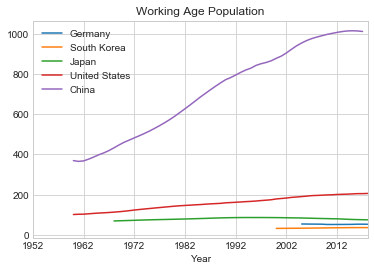

In [38]:
df_countries.plot(title='Working Age Population')

In [39]:
df_temp = df_countries.copy()

In [40]:
# Normalize data
df_temp2 = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())

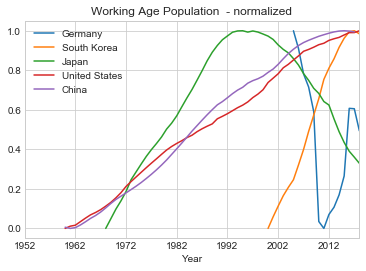

In [41]:
df_temp2.plot(title='Working Age Population  - normalized')

In [42]:
df_temp3 = (df_temp / df_temp.max()) * 100

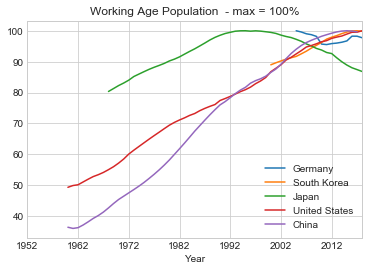

In [43]:
df_temp3.plot(title='Working Age Population  - max = 100%')

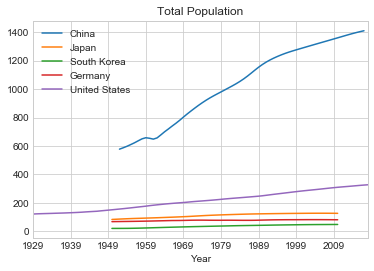

In [44]:
df_countries_total.plot(title='Total Population')

In [45]:
df_countries_total

,China,Japan,South Korea,Germany,United States
Year,,,,,
1929,NaN,NaN,NaN,NaN,121.878
1930,NaN,NaN,NaN,NaN,123.188
1931,NaN,NaN,NaN,NaN,124.149
1932,NaN,NaN,NaN,NaN,124.949
1933,NaN,NaN,NaN,NaN,125.690
1934,NaN,NaN,NaN,NaN,126.485
1935,NaN,NaN,NaN,NaN,127.362
1936,NaN,NaN,NaN,NaN,128.181
1937,NaN,NaN,NaN,NaN,128.961
